# MÉTODO MONTECARLO
## PROYECTO MÓDULO 2
##### Equipo integrado por:
##### OSWALD ACEVES DÍAZ
##### JIMENA ARGÜELLES PÉREZ
##### SERGIO RENATO GONZÁLEZ MENDOZA

### COMPARACIÓN DE ACCIÓNES A FUTURO

* OBJETIVO GENERAL:

Saber cuál empresa perteneciente al sector tecnológico es más probable a aumentar el valor de sus acciónes en un 10%, mediante la comparación de predicciónes realizadas con 1000 escenarios posibles para cada compañía.

* OBJETIVOS ESPECÍFICOS:

En base a 5 empresas del sector tecnológico, tomando como referencia información de FactSet y Yahoo Finance:

1. Calcular la desviación estándar y la media durante el año 2022.

2. Simular y graficar 1000 escenarios de los rendimientos.

3. Evaluar y comparar resultados para saber que empresa es más probable que aumente su valor.

______________________________________________________

### Desviación estándar y media durante el año 2022

In [1]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Fecha de inicio de los datos recuperados
names=['U','NVDA','AMD','LNVGY', 'SONY']
start='2022-01-01' 

#Fecha de fin de los datos recuperados
end='2022-11-01'   

In [3]:
def get_close(name,start,end):
    return web.DataReader(name,'yahoo',start,end)['Adj Close'] #Datos de Yahoo Finance

In [4]:
#Mostrar fecha de los precios de cierre

data=get_close(names,start,end) 
data.head()

Symbols,U,NVDA,AMD,LNVGY,SONY
Date,,,,,
2022-01-03,138.649994,301.005585,150.240005,22.343988,126.269997
2022-01-04,129.729996,292.701202,144.419998,21.998165,128.559998
2022-01-05,121.010002,275.852661,136.149994,22.190289,128.589996
2022-01-06,119.750000,281.588776,136.229996,21.988558,123.110001
2022-01-07,120.379997,272.285095,132.000000,22.267138,124.309998


<AxesSubplot:xlabel='Date'>

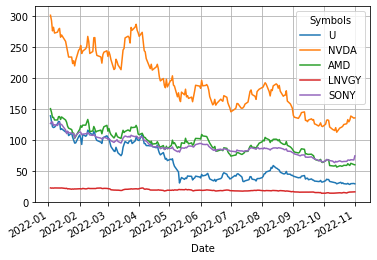

In [5]:
#Gráfica del comportamiento empresarial durante 1 año

data.plot(grid=True)

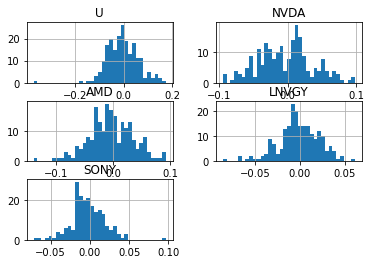

In [6]:
#Sus respectivos histogramas

R=data.pct_change().dropna()
H=R.hist(bins=35)

In [7]:
#Media de cada una de las empresas

me,std=R.mean(),R.std() 
me   

Symbols
U       -0.005258
NVDA    -0.003029
AMD     -0.003658
LNVGY   -0.001338
SONY    -0.002325
dtype: float64

In [8]:
#Desviación estándar de cada una de las empresas

std 

Symbols
U        0.065172
NVDA     0.039677
AMD      0.038705
LNVGY    0.022833
SONY     0.021399
dtype: float64

______________________

### Simulación de los 1000 escenarios

<AxesSubplot:xlabel='Date'>

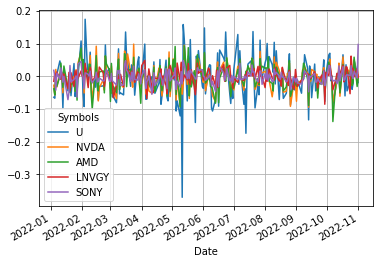

In [9]:
R.plot(grid=True)

In [10]:
#Número de predicciónes
N=1000 

#Número de días a simular
d=31 

In [12]:
#El tamaño de la matriz simula 10 días y 10 escenarios.
np.random.normal(1,1,(10,10)) 

array([[-0.9046793 , -0.76319841,  0.75042365,  1.95606955,  1.58605393,
         0.73001932,  0.6046516 ,  1.90482558,  0.51662562,  1.38928914],
       [ 1.29503636,  2.10662986,  0.08824635,  2.3714584 ,  3.0892521 ,
         1.90314523,  2.07149794, -0.01296191,  0.96371817,  2.6584527 ],
       [ 2.16280702, -0.35409654,  0.2935313 ,  2.45308917,  1.82763004,
        -0.54730248, -0.35887888,  1.82156899,  1.47226806,  2.11188712],
       [ 1.44712117,  2.79822733,  1.22000003,  1.67087525,  2.15174419,
         0.97197226,  1.81550059,  1.67215079,  1.39238107,  0.4252524 ],
       [ 1.04368734,  1.19204232,  1.1395488 ,  1.90958686,  2.67579824,
         1.62825376,  2.14815606, -0.04716043, -1.19436728, -0.46441071],
       [ 1.82238643,  0.95939926,  1.35843989,  1.35858239,  0.20163341,
         1.20655749,  1.09667613, -0.4773418 , -0.10450719,  2.15556131],
       [ 0.88639698,  1.82541306,  0.72275262,  1.14655823,  0.36161882,
         2.17172486, -0.27352495, -0.91659281

In [13]:
def simR(me,std,start,d,N):
    fechas=pd.date_range(start,periods=d)
    return pd.DataFrame(index=fechas,data=np.random.normal(me,std,(d,N)))
rU=simR(me['U'],std['U'],'01-01-2023',d,N)
rAMD=simR(me['AMD'],std['AMD'],'01-01-2023',d,N)
rNVDA=simR(me['NVDA'],std['NVDA'],'01-01-2023',d,N)
rLVNGY=simR(me['LNVGY'],std['LNVGY'],'01-01-2023',d,N)
rSONY=simR(me['SONY'],std['SONY'],'01-01-2023',d,N)

In [50]:
#Simulación de datos de escenarios distintos buscando una tendencia. 
rU.head(3) 

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2023-01-01,-0.026828,0.034995,-0.042794,0.106007,0.004481,-0.025625,-0.036637,-0.068798,-0.007976,-0.059377,...,0.044970,0.039059,-0.069762,0.065308,0.028029,-0.089173,-0.068849,-0.083842,0.072566,-0.111499
2023-01-02,-0.034138,-0.105298,-0.142527,-0.103031,-0.110745,0.014030,-0.012030,-0.014938,0.018846,0.044161,...,0.045320,0.027575,0.108011,-0.012386,-0.043306,-0.065935,0.066833,0.117358,0.095483,-0.023636
2023-01-03,-0.038438,-0.077387,-0.036646,-0.055155,-0.032038,0.014802,0.008508,-0.045553,0.035791,0.082332,...,-0.037849,-0.085999,0.074892,-0.027238,0.008511,-0.009228,0.103803,0.119059,-0.174278,-0.028942


In [15]:
data.iloc[-1]

Symbols
U         28.930000
NVDA     135.429993
AMD       59.660000
LNVGY     15.990000
SONY      74.010002
Name: 2022-11-01 00:00:00, dtype: float64

In [41]:
U=data['U'].iloc[-1]*(rU+1).cumprod() #Multiplicación sucesiva de rendimientos +1
U.head(3)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2023-01-01,28.153854,29.942400,27.691966,31.996779,29.059648,28.188660,27.870091,26.939686,28.699264,27.212230,...,30.230996,30.059978,26.911799,30.819351,29.740885,26.350227,26.938208,26.504462,31.029326,25.704339
2023-01-02,27.192739,26.789510,23.745123,28.700134,25.841436,28.584141,27.534801,26.537249,29.240136,28.413957,...,31.601070,30.888895,29.818569,30.437621,28.452915,24.612815,28.738568,29.614962,33.992087,25.096781
2023-01-03,26.147505,24.716337,22.874956,27.117170,25.013531,29.007254,27.769057,25.328392,30.286676,30.753323,...,30.404988,28.232490,32.051747,29.608548,28.695085,24.385685,31.721708,33.140901,28.068019,24.370429


<AxesSubplot:>

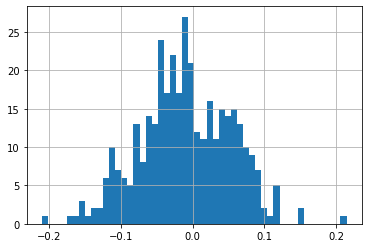

In [17]:
simU=simR(me['U'],std['U'],'2022-01-01',365,1000)
simU[2].hist(bins=50)

In [18]:
#Multiplicación sucesiva de rendimientos +1
AMD=data['AMD'].iloc[-1]*(rAMD+1).cumprod()
AMD.head(3)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2023-01-01,53.187374,58.466371,62.375267,57.189373,60.321689,57.916907,59.487216,60.310131,59.309797,58.232723,...,60.801437,59.089804,58.919615,60.783806,59.339745,59.268998,61.161604,57.434499,60.921353,59.910665
2023-01-02,52.234020,56.298389,67.447833,56.675872,56.325056,55.749871,58.132072,59.607520,60.201749,58.039999,...,60.962631,60.454387,58.462622,62.795539,59.499860,60.697404,53.298047,59.000001,60.366213,57.438117
2023-01-03,51.816835,55.802101,64.267425,58.350102,59.835413,57.253532,58.572196,58.185085,61.042777,56.727554,...,61.002275,64.854736,58.019160,59.545998,57.595303,60.694962,51.688814,57.100603,62.026439,60.422367


<AxesSubplot:>

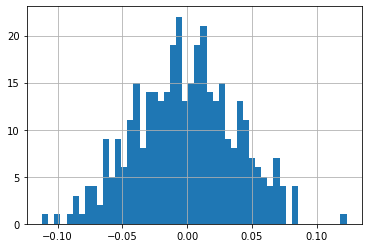

In [19]:
simAMD=simR(me['AMD'],std['AMD'],'2022-01-01',365,1000)
simAMD[2].hist(bins=50)

In [20]:
NVDA=data['NVDA'].iloc[-1]*(rNVDA+1).cumprod()#multiplicacion sucesiva de rendimientos +1
NVDA.head(3)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2023-01-01,136.664765,137.898759,129.132541,130.182447,135.283453,132.843362,131.631278,132.770276,135.537025,144.029106,...,133.886868,142.313597,143.370968,143.235191,139.344602,131.771768,137.482244,138.900089,126.066182,142.564082
2023-01-02,129.493371,133.964567,130.560555,131.121885,130.453633,126.108144,127.922001,128.764978,134.737546,153.661511,...,144.554305,141.059005,137.567950,143.039240,126.108737,131.095467,134.195268,132.624129,124.640029,133.764418
2023-01-03,128.596671,135.569563,125.861171,134.012312,136.679853,129.274817,127.862543,125.745837,134.864313,149.477529,...,137.508923,140.300054,140.835834,137.795973,131.183100,129.878781,127.178357,139.461752,119.119153,136.568326


<AxesSubplot:>

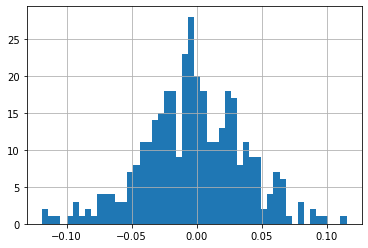

In [21]:
simNVDA=simR(me['NVDA'],std['NVDA'],'2022-01-01',365,1000)
simNVDA[2].hist(bins=50)

In [22]:
LNVGY=data['LNVGY'].iloc[-1]*(rLVNGY+1).cumprod()#multiplicacion sucesiva de rendimientos +1
LNVGY.head(3)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2023-01-01,15.923218,15.492300,16.084879,16.276130,15.296372,16.198396,15.960269,16.449539,15.453838,16.194740,...,16.135980,15.387331,15.320356,15.488145,16.376871,16.185574,16.030087,16.299586,16.084326,16.165244
2023-01-02,15.853595,15.641079,16.270003,15.886636,15.081808,15.936914,15.627454,16.382879,15.286154,16.487172,...,16.021945,14.862944,15.942024,15.731826,16.622522,15.987284,16.379883,16.857860,16.310611,16.050334
2023-01-03,16.808571,15.278964,16.572270,15.768636,15.461115,16.277842,15.382873,16.367173,15.222050,16.198598,...,16.054685,14.817234,15.680407,15.543120,17.141087,15.945883,15.896742,16.845862,16.382035,15.825718


<AxesSubplot:>

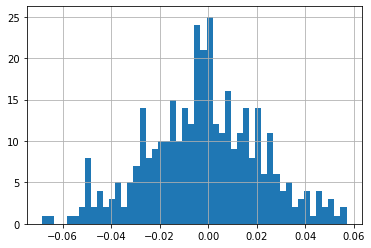

In [23]:
simLNVGY=simR(me['LNVGY'],std['LNVGY'],'2022-01-01',365,1000)
simLNVGY[2].hist(bins=50)

In [49]:
SONY=data['SONY'].iloc[-1]*(rSONY+1).cumprod()#Multiplicación sucesiva de rendimientos +1
SONY.head(3)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2023-01-01,74.225071,74.434014,73.744957,73.368184,73.102744,72.148447,75.810852,73.542755,73.293089,72.967606,...,76.436284,77.296709,72.054448,72.414411,73.589299,71.808358,73.196906,72.584780,71.398188,72.473126
2023-01-02,76.853343,72.052666,74.604656,75.112941,71.772671,69.815699,75.445504,74.838706,74.099837,73.815210,...,76.309634,77.495356,70.805496,72.779289,72.024715,71.018180,74.744233,72.934265,70.922519,73.652428
2023-01-03,74.154355,70.275462,77.913999,73.691539,72.452109,66.979776,75.942708,73.799568,74.555509,76.087820,...,75.659192,77.090537,70.399937,72.324605,71.771372,70.936133,74.728387,75.720927,68.709076,74.732855


<AxesSubplot:>

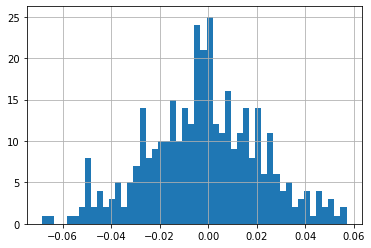

In [25]:
simSONY=simR(me['SONY'],std['SONY'],'2022-01-01',365,1000)
simLNVGY[2].hist(bins=50)

_______


### 1000 ESCENARIOS DE SIMULACIÓNES PARA CADA EMPRESA

In [26]:
U=data['U'].iloc[-1]*(simU+1).cumprod()
AMD=data['AMD'].iloc[-1]*(simAMD+1).cumprod()
NVDA=data['NVDA'].iloc[-1]*(simNVDA+1).cumprod()
LNVGY=data['LNVGY'].iloc[-1]*(simLNVGY+1).cumprod()
SONY=data['SONY'].iloc[-1]*(simSONY+1).cumprod()

#### 1000 ESCENARIOS PARA UNITY

<AxesSubplot:>

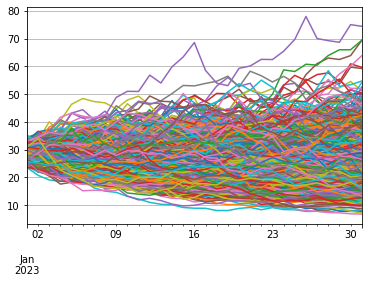

In [42]:
U.plot(grid=True,legend=False)

#### 1000 ESCENARIOS AMD

<AxesSubplot:>

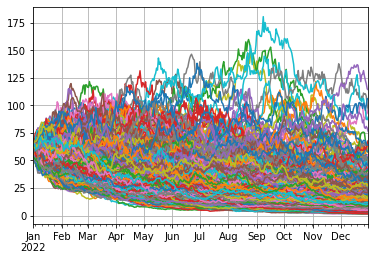

In [45]:
AMD.plot(grid=True,legend=False)

#### 1000 ESCENARIOS NVDA

<AxesSubplot:>

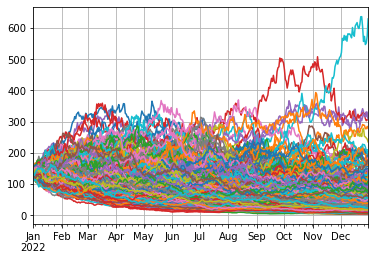

In [46]:
NVDA.plot(grid=True,legend=False)

#### 1000 ESCENARIOS LNVGY

<AxesSubplot:>

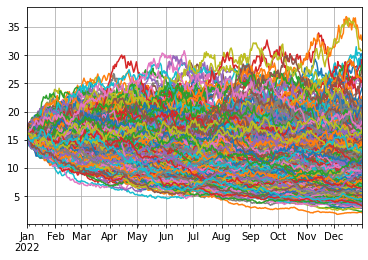

In [47]:
LNVGY.plot(grid=True,legend=False)

#### 1000 ESCENARIOS SONY

<AxesSubplot:>

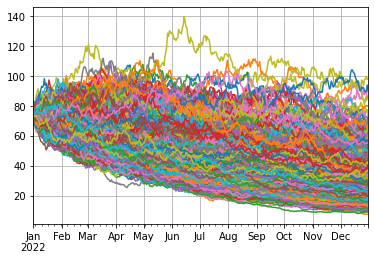

In [48]:
SONY.plot(grid=True,legend=False)

_____

In [32]:
UU=1.10*data['U'].iloc[-1]
UU

31.82300033569336

<AxesSubplot:>

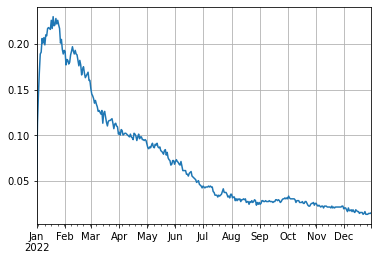

In [33]:
BU=U>UU
PU=BU.mean(axis=1)
PU.plot(grid=True)

Se refleja que tiene una tendencia bajista, así que podrían existir pérdidas si se adquiere la acción de enero a agosto.

<AxesSubplot:>

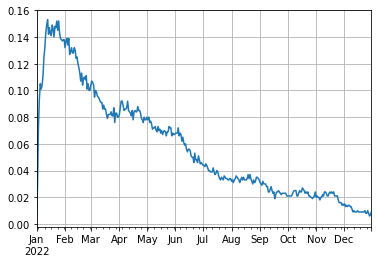

In [34]:
UAMD=1.10*data['AMD'].iloc[-1]
BAMD=AMD>UAMD
PAMD=BAMD.mean(axis=1)
PAMD.plot(grid=True)

Existe una tendencia bajiista que dura de enero a septiembre con bajadas más abruptas.

<AxesSubplot:>

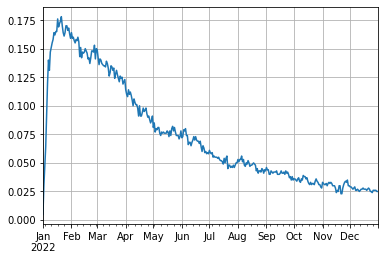

In [35]:
UNVDA=1.10*data['NVDA'].iloc[-1]
BNVDA=NVDA>UNVDA
PNVDA=BNVDA.mean(axis=1)
PNVDA.plot(grid=True)

Se manifiesta una caída importante desde mediados de enero hasta julio, bajando alrededor del 12% en este parámetro.  

<AxesSubplot:>

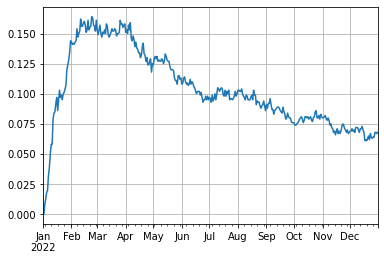

In [36]:
ULNVGY=1.10*data['LNVGY'].iloc[-1]
BLNVGY=LNVGY>ULNVGY
PLNVGY=BLNVGY.mean(axis=1)
PLNVGY.plot(grid=True)

Inicia a la alza de enero hasta marzo, posteriormente cae para mantenerse un tanto estable de septiembre en adelante.

<AxesSubplot:>

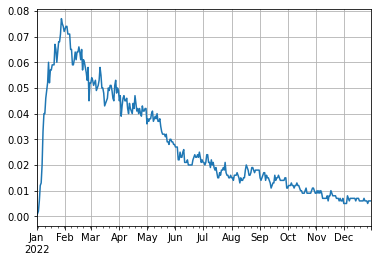

In [37]:
USONY=1.10*data['SONY'].iloc[-1]
BSONY=SONY>USONY
PSONY=BSONY.mean(axis=1)
PSONY.plot(grid=True)

Inicia con una tendencia alcista los primeros dos meses, más tarde; en marzo sufre una caída que persiste a lo largo del año.

______

<AxesSubplot:>

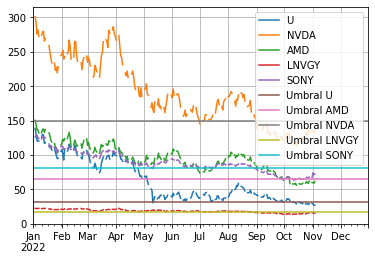

In [38]:
dt2022=get_close(names,'2022-01-01','2022-12-31')
fechas=pd.date_range('2022-01-01',periods=365)
dtUU=pd.DataFrame(index=fechas,data=UU*np.ones(365),columns=['Umbral U'])
dtUAMD=pd.DataFrame(index=fechas,data=UAMD*np.ones(365),columns=['Umbral AMD'])
dtUNVDA=pd.DataFrame(index=fechas,data=UNVDA*np.ones(365),columns=['Umbral NVDA'])
dtULNVGY=pd.DataFrame(index=fechas,data=ULNVGY*np.ones(365),columns=['Umbral LNVGY'])
dtUSONY=pd.DataFrame(index=fechas,data=USONY*np.ones(365),columns=['Umbral SONY'])
dt2022=pd.concat([dt2022,dtUU,dtUAMD,dtUNVDA,dtULNVGY,dtUSONY],axis=1)
dt2022.plot(grid=True)

_____

#### CONCLUSIONES

1. Sony y Lenovo tienen menores probabilidades a bajar

2. El sector tecnológico se encuentra tendiendo a la baja, por lo que existen dos opciones favorables:

Tomar ventaja de la situación comprando en corto.

Permanecer con las acciones por más tiempo hasta que se genere rendimiento gracias a los nuevos proyectos por parte de las empresas.

**REFERENCIAS**

Yahoo Finance - Stock Market Live, Quotes, Business & Finance News. (s/f). Recuperado el 6 de abril de 2022, de https://finance.yahoo.com/